In [1]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
#import data
features = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv', index_col=0)
features = features.drop('peak_int', 1)
features.head(5)

,ACCESSION,class1,class2,class3,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
7,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.063692,0.122807,0.002695
8,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.037912,0.122807,0.008985
9,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.034229,0.122807,0.089847
10,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.030329,0.122807,0.053908
11,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.028596,0.122807,0.013477


In [3]:
#display all informations of the data frame
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44524 entries, 7 to 49307
Data columns (total 9 columns):
ACCESSION           44524 non-null object
class1              44524 non-null object
class2              44524 non-null object
class3              44524 non-null object
AC_mode             44524 non-null int64
ion_precursor_mz    44524 non-null float64
peak_mz             44524 non-null float64
num_peak            44524 non-null float64
peak_rel_int        44524 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.4+ MB


In [4]:
#Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
features.describe()

,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
count,44524.000000,44524.000000,44524.000000,44524.000000,44524.000000
mean,0.640890,0.199108,0.056068,0.137794,0.226142
std,0.479745,0.132022,0.043979,0.116932,0.287190
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.087571,0.022968,0.052632,0.045822
50%,1.000000,0.193968,0.042244,0.105263,0.089847
75%,1.000000,0.291334,0.073224,0.175439,0.256963
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#information for the target classe 1 
print('classe 1 :', '\n',features['class1'].describe())

classe 1 : 
 count         44524
unique          106
top       Flavonoid
freq          15489
Name: class1, dtype: object


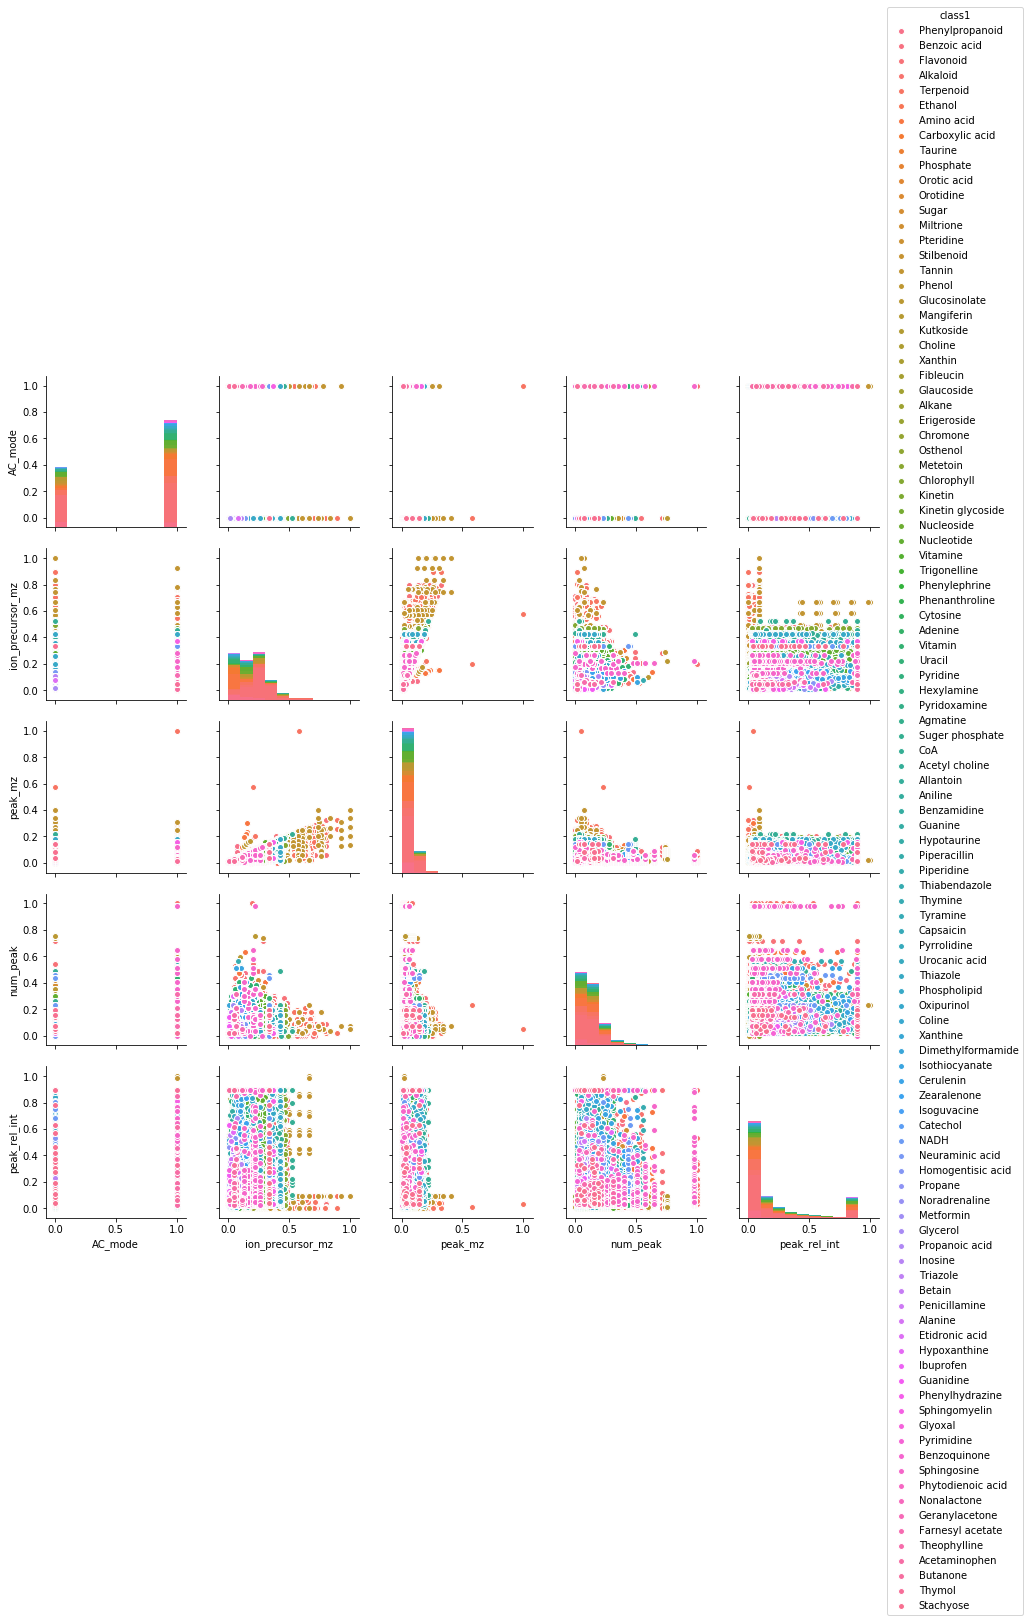

In [6]:
#When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. 
#This is very useful for exploring correlations between multidimensional data, 
#when you'd like to plot all pairs of values against each other.
sns.pairplot(features, hue='class1', size=2.5);

In [7]:
print("one possible correlation between peak_mz and ion_precursor_mz")

one possible correlation between peak_mz and ion_precursor_mz


In [8]:
train_df, test_df = train_test_split(features, test_size = .1)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40071 entries, 45272 to 29375
Data columns (total 9 columns):
ACCESSION           40071 non-null object
class1              40071 non-null object
class2              40071 non-null object
class3              40071 non-null object
AC_mode             40071 non-null int64
ion_precursor_mz    40071 non-null float64
peak_mz             40071 non-null float64
num_peak            40071 non-null float64
peak_rel_int        40071 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 41205 to 16937
Data columns (total 9 columns):
ACCESSION           4453 non-null object
class1              4453 non-null object
class2              4453 non-null object
class3              4453 non-null object
AC_mode             4453 non-null int64
ion_precursor_mz    4453 non-null float64
peak_mz             4453 non-null float64
num_peak            4453 non-null float64
peak_rel_int        4453 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.9+ KB


In [11]:
#target is class1
drop = ['class1', 'class2', 'class3', 'ACCESSION']

X_train = train_df.drop(drop, axis=1)
Y_train = train_df["class1"]
X_test  = test_df.drop(drop, axis=1).copy()

In [12]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

32.89 %


In [13]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.79 %


In [14]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

43.94 %


In [15]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

76.77 %


In [16]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

23.72 %


In [17]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

30.3 %


In [18]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

44.03 %


In [19]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.79 %


In [20]:
#wich is the best model?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.79,Random Forest
99.79,Decision Tree
76.77,KNN
44.03,Support Vector Machines
43.94,Logistic Regression
32.89,Stochastic Gradient Decent
30.30,Perceptron
23.72,Naive Bayes


In [21]:
#As we can see, the Random Forest classifier goes on the first place. 
#But first, let us check, how random-forest performs, when we use cross validation

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [22]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.87355474  0.88732394  0.88114144  0.88321713  0.88189763  0.88263263
  0.88023052  0.88230866  0.88749056  0.88115064]
Mean: 0.882094789136
Standard Deviation: 0.00369188652536


In [35]:
print('Our model has a average accuracy of 88% with a standard deviation of 4%', '\n',
     'The standard deviation shows us, how precise the estimates are.', '\n',
     'This means in our case that the accuracy of our model can differ + - 4%.', '\n',
     'The accuracy is really good, we will try to increase it\'s performance even further in the following section.')

Our model has a average accuracy of 88% with a standard deviation of 4% 
 The standard deviation shows us, how precise the estimates are. 
 This means in our case that the accuracy of our model can differ + - 4%. 
 The accuracy is really good, we will try to increase it's performance even further in the following section.


In [24]:
#measure the relative importance of each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [25]:
importances.head(15)

,importance
feature,
ion_precursor_mz,0.480
peak_mz,0.234
num_peak,0.147
peak_rel_int,0.118
AC_mode,0.021


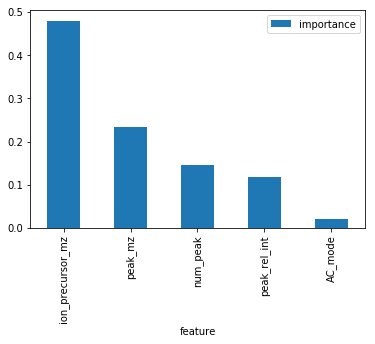

In [26]:
importances.plot.bar();

In [27]:
print('AC_mode doesn\'t play a significant role in our random forest classifiers prediction process.', '\n',
      'Because of that I will drop them from the dataset and train the classifier again')

AC_mode doesn't play a significant role in our random forest classifiers prediction process. 
 Because of that I will drop them from the dataset and train the classifier again


In [28]:
train_df  = train_df.drop("AC_mode", axis=1)
test_df  = test_df.drop("AC_mode", axis=1)

drop = ['class1', 'class2', 'class3', 'ACCESSION']

X_train = train_df.drop(drop, axis=1)
Y_train = train_df["class1"]
X_test  = test_df.drop(drop, axis=1).copy()

In [29]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.76 %


In [30]:
#this is another way to evaluate the classifier, which is probably much more accurate than the score from above
#Score of the training dataset obtained using an out-of-bag estimate
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 89.16 %


In [31]:
#hyper parameter tuning
param_grid = {"min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 2}

In [32]:
param_grid = {"criterion" : ["gini", "entropy"]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'criterion': 'entropy'}

In [33]:
#très long!!!
param_grid = {"min_samples_leaf" : [1, 5, 10]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_leaf': 1}

In [36]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, #min number of data points allowed in a leaf node
                                       min_samples_split = 2, #min number of data points placed in a node before the node is split  
                                       n_estimators=100, #number of trees in the foreset
                                       max_features='auto', #max number of features considered for splitting a node
                                       oob_score=True, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 90.44 %


In [37]:
print('the score was ameliorated from 89% to 90% after hyperparameters tuning')

the score was ameliorated from 89% to 90% after hyperparameters tuning


In [38]:
#further evaluation 
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([[ 10,   0,   0, ...,   0,   0,   0],
       [  0,  18,   0, ...,   0,   0,   0],
       [  0,   0, 102, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   2,   0,   0],
       [  0,   0,   0, ...,   0,  19,   0],
       [  0,   0,   0, ...,   0,   0,  54]], dtype=int64)

In [39]:
print('to big to be informative')

to big to be informative


In [42]:
#precision and recall

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions, average='micro'))
print("Recall:",recall_score(Y_train, predictions, average='micro'))

Precision: 0.878141299194
Recall: 0.878141299194


In [43]:
print('Our model predicts 87% of the time a class correctly (precision).', '\n' 
      'The recall tells us that it predicted the class of 87% of the molecules actually classed.')

Our model predicts 87% of the time a class correctly (precision). 
The recall tells us that it predicted the class of 87% of the molecules actually classed.


In [45]:
#You can combine precision and recall into one score, which is called the F-score. 
from sklearn.metrics import f1_score
f1_score(Y_train, predictions, average='micro')

0.8781412991939308